In [1]:
# 1. GEREKLƒ∞ K√úT√úPHANELER
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2. VERƒ∞Yƒ∞ Y√úKLE
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# 3. ƒ∞LK ƒ∞NCELEME
print(df.shape)
print(df.columns)
print(df.isnull().sum())
df.describe()

(130663, 17)
Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')
artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


acousticness   danceability   duration_ms         energy  \
count  130663.000000  130663.000000  1.306630e+05  130663.000000   
mean        0.342500       0.581468  2.126331e+05       0.569196   
std         0.345641       0.190077  1.231551e+05       0.260312   
min         0.000000       0.000000  3.203000e+03       0.000000   
25%         0.031600       0.459000  1.639225e+05       0.396000   
50%         0.203000       0.605000  2.019010e+05       0.603000   
75%         0.636000       0.727000  2.410475e+05       0.775000   
max         0.996000       0.996000  5.610020e+06       1.000000   

       instrumentalness            key       liveness       loudness  \
count     130663.000000  130663.000000  130663.000000  130663.000000   
mean           0.224018       5.231894       0.194886      -9.974006   
std            0.360328       3.602701       0.167733       6.544379   
min            0.000000       0.000000       0.000000     -60.000000   
25%            0.000000       2.000000       0.097500     -11.898000   
50%            0.000149       5.000000       0.124000      -7.979000   
75%            0.440000       8.000000       0.236000      -5.684000   
max            1.000000      11.000000       0.999000       1.806000   

                mode    speechiness          tempo  time_signature  \
count  130663.000000  130663.000000  130663.000000   130663.000000   
mean        0.607739       0.112015     119.473353        3.878986   
std         0.488256       0.124327      30.159636        0.514403   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.038900      96.014000        4.000000   
50%         1.000000       0.055900     120.027000        4.000000   
75%         1.000000       0.129000     139.642000        4.000000   
max         1.000000       0.966000     249.983000        5.000000   

             valence     popularity  
count  130663.000000  130663.000000  
mean        0.439630      24.208988  
std         0.259079      19.713191  
min         0.000000       0.000000  
25%         0.224000       7.000000  
50%         0.420000      22.000000  
75%         0.638000      38.000000  
max         1.000000     100.000000

In [2]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum()
print("U√ß deƒüer sayƒ±sƒ±:\n", dict(zip(numeric_cols, outliers)))


U√ß deƒüer sayƒ±sƒ±:
 {'acousticness': 0, 'danceability': 292, 'duration_ms': 1225, 'energy': 0, 'instrumentalness': 0, 'key': 0, 'liveness': 3749, 'loudness': 2499, 'mode': 0, 'speechiness': 2247, 'tempo': 400, 'time_signature': 2048, 'valence': 0, 'popularity': 250}


In [3]:
from scipy import stats

# Sayƒ±sal s√ºtunlarƒ± se√ß
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Her s√ºtun i√ßin normal daƒüƒ±lƒ±m testi
for col in numeric_cols:
    clean_data = df[col].dropna()
    if len(clean_data) > 7:  # Normaltest i√ßin minimum veri
        stat, p = stats.normaltest(clean_data)
        print(f"{col} i√ßin p-deƒüeri: {p:.4f} {'(Normal daƒüƒ±lƒ±m olabilir)' if p > 0.05 else '(Normal deƒüil)'}")
    else:
        print(f"{col}: Veri sayƒ±sƒ± normal test i√ßin yetersiz.")


acousticness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
danceability i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
duration_ms i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
energy i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
instrumentalness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
key i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
liveness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
loudness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
mode i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
speechiness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
tempo i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
time_signature i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
valence i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)
popularity i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


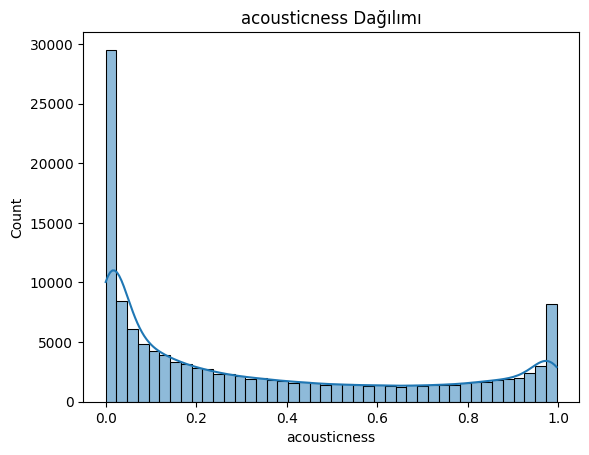

acousticness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


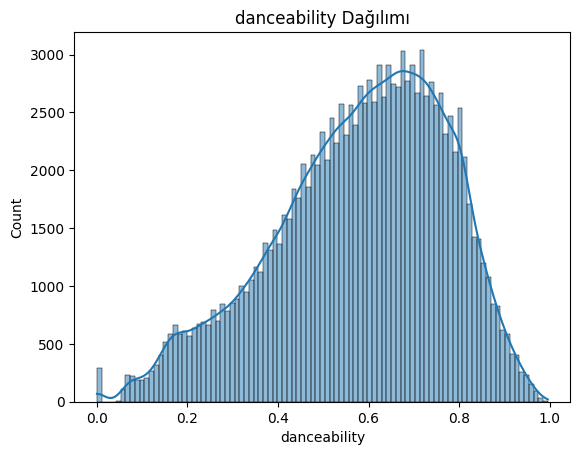

danceability i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


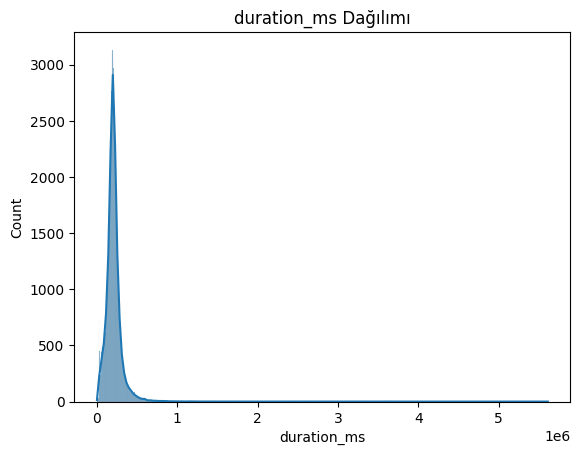

duration_ms i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


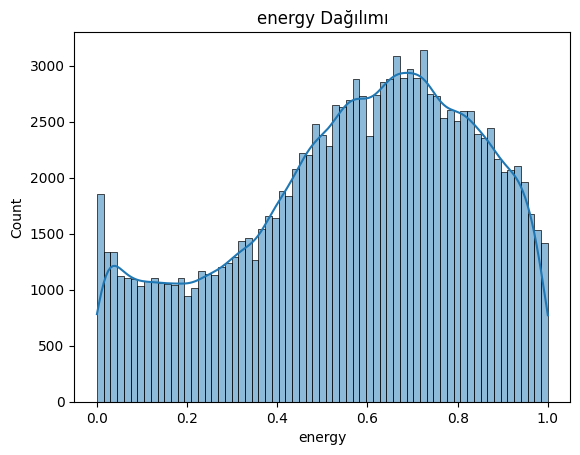

energy i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


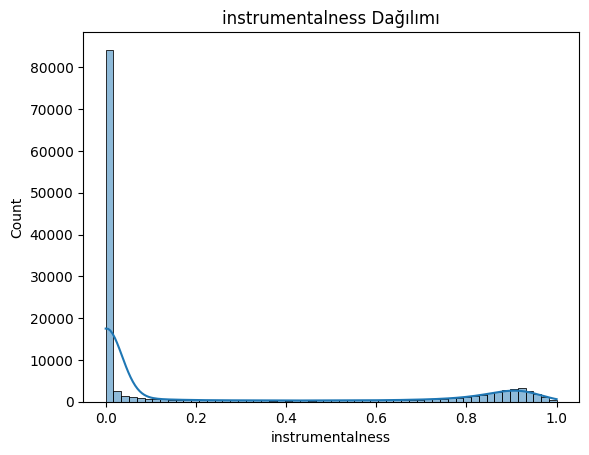

instrumentalness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


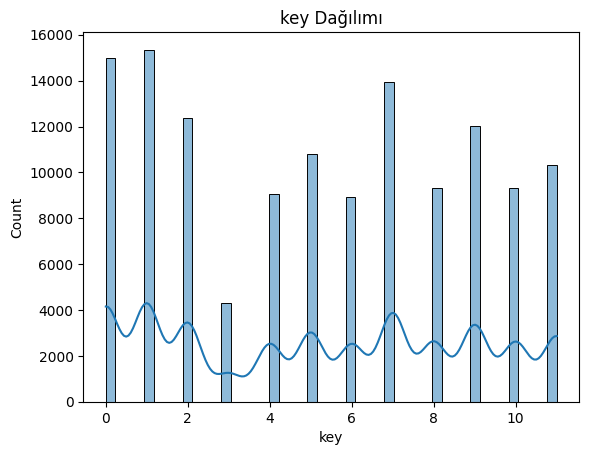

key i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


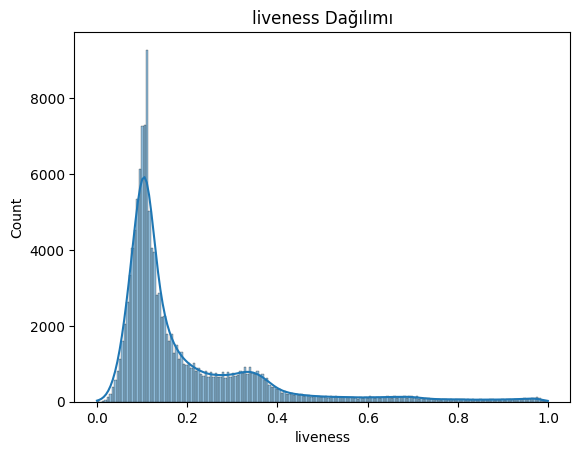

liveness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


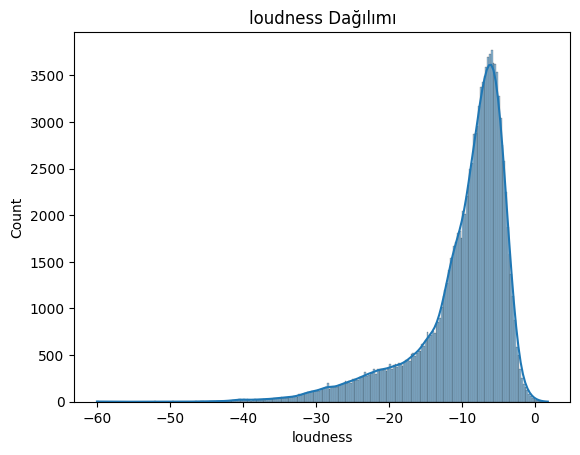

loudness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


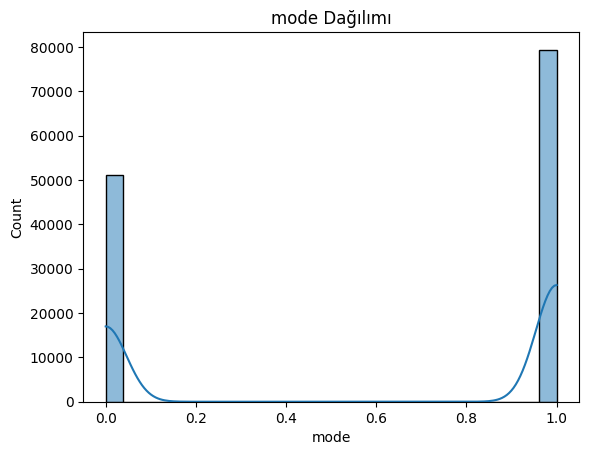

mode i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


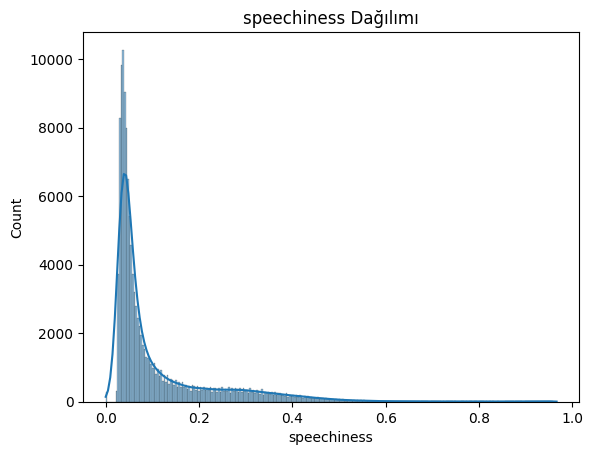

speechiness i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


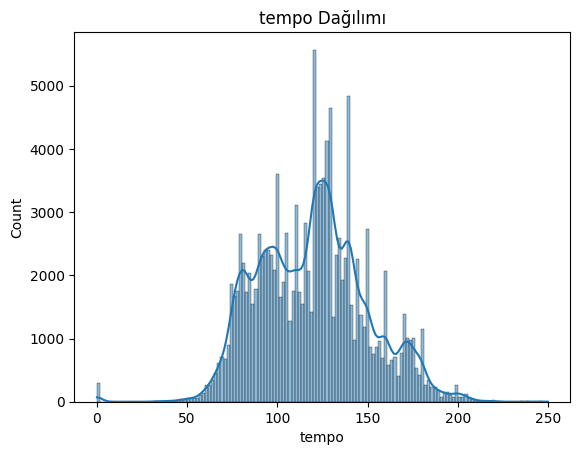

tempo i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


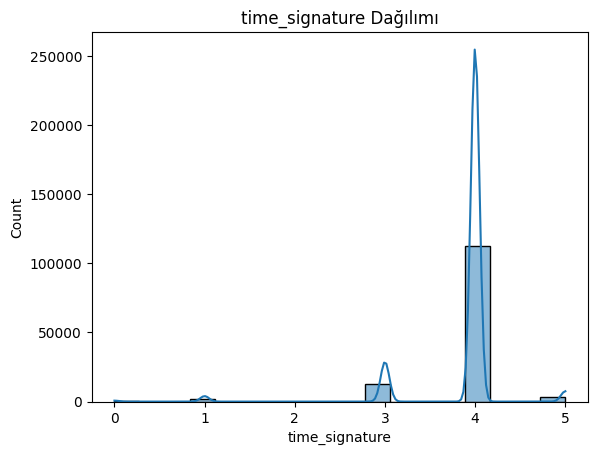

time_signature i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


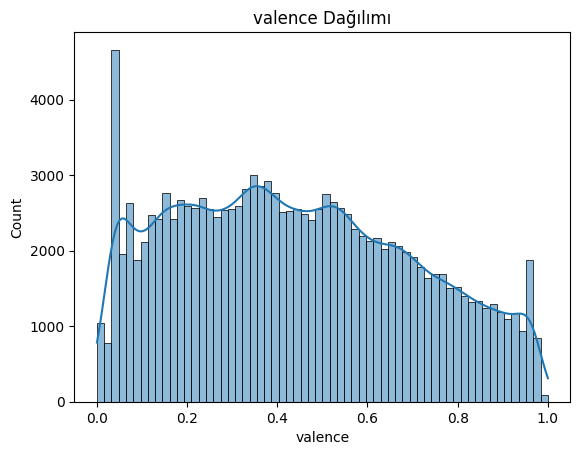

valence i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


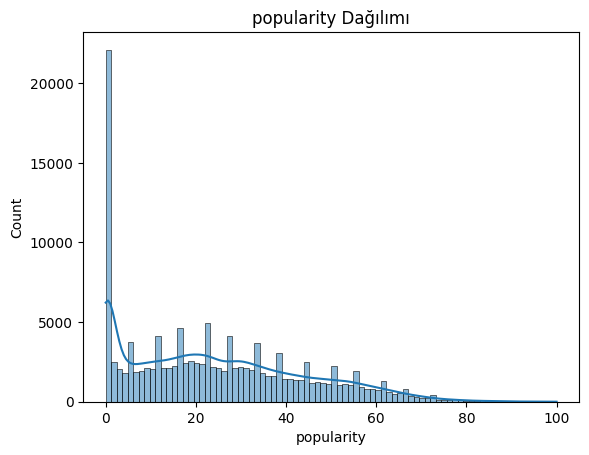

popularity i√ßin p-deƒüeri: 0.0000 (Normal deƒüil)


In [4]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Daƒüƒ±lƒ±mƒ±")
    plt.show()

    stat, p = stats.normaltest(df[col].dropna())
    print(f"{col} i√ßin p-deƒüeri: {p:.4f} {'(Normal daƒüƒ±lƒ±m olabilir)' if p > 0.05 else '(Normal deƒüil)'}")


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


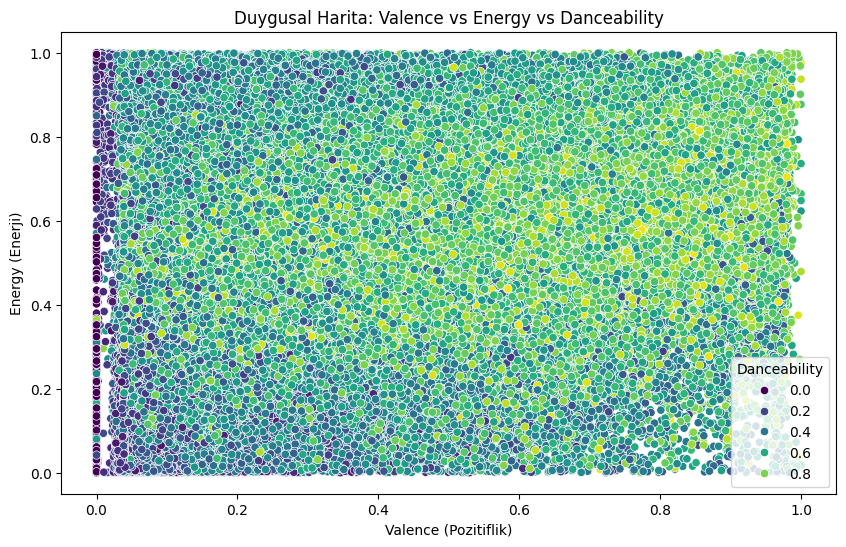

C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


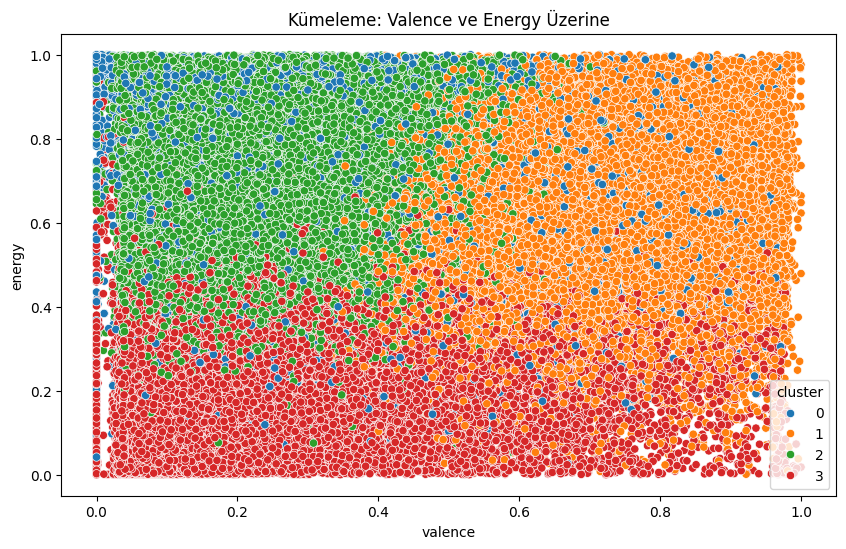

In [5]:
# 5. DUYGU HARƒ∞TASI: VALENCE vs ENERGY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="valence", y="energy", hue="danceability", palette="viridis")
plt.title("Duygusal Harita: Valence vs Energy vs Danceability")
plt.xlabel("Valence (Pozitiflik)")
plt.ylabel("Energy (Enerji)")
plt.legend(title="Danceability")
plt.show()

# 6. K-MEANS K√úMELEME
features = df[["acousticness", "danceability", "energy", "valence", "liveness"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled)

# K√ºme g√∂rselle≈ütirme (valence vs energy)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="valence", y="energy", hue="cluster", palette="tab10")
plt.title("K√ºmeleme: Valence ve Energy √úzerine")
plt.show()

In [6]:
# Kullanacaƒüƒ±mƒ±z √∂zellikler
feature_cols = ["acousticness", "danceability", "energy", "valence", "liveness"]

# √ñzellikleri √∂l√ßekle (bunu bir kere yap)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])
for i, col in enumerate(feature_cols):
    df[col + "_scaled"] = scaled_features[:, i]

In [7]:
def compare_songs(song1, song2, feature_cols):
    song1_vals = [song1[col] for col in feature_cols]
    song2_vals = [song2[col] for col in feature_cols]

    x = range(len(feature_cols))

    plt.figure(figsize=(10, 6))
    plt.bar(x, song1_vals, width=0.4, label=f"{song1['track_name']} - {song1['artist_name']}", align='center')
    plt.bar([i + 0.4 for i in x], song2_vals, width=0.4, label=f"{song2['track_name']} - {song2['artist_name']}", align='center')
    plt.xticks([i + 0.2 for i in x], feature_cols)
    plt.ylabel("√ñzellik Deƒüeri")
    plt.title("≈ûarkƒ± √ñzellik Kar≈üƒ±la≈ütƒ±rmasƒ±")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [8]:
def find_most_similar_song_by_name(song_name, artist_name=None, popularity_threshold=50):
    print("np t√ºr√º:", type(np))  # hata ayƒ±klama

    if artist_name:
        candidates = df[(df["track_name"].str.lower() == song_name.lower()) &
                        (df["artist_name"].str.lower() == artist_name.lower())]
    else:
        candidates = df[df["track_name"].str.lower() == song_name.lower()]

    if candidates.empty:
        print("≈ûarkƒ± ismine tam e≈üle≈üme bulunamadƒ±, en yakƒ±n isimli ≈üarkƒ± aranƒ±yor...")
        candidates = df[df["track_name"].str.lower().str.contains(song_name.lower(), na=False)]

        if candidates.empty:
            print("Hi√ß benzer isimli ≈üarkƒ± bulunamadƒ±.")
            return None

    song = candidates.iloc[0]
    print(f"Bulunan ≈üarkƒ±: '{song['track_name']}' - {song['artist_name']}'")

    song_features = song[[col + "_scaled" for col in feature_cols]].to_numpy().ravel()
    all_features = df[[col + "_scaled" for col in feature_cols]].to_numpy()

    # T√ºm satƒ±rlar i√ßin mesafeleri hesapla
    diff = all_features - song_features
    squared_diff = diff ** 2
    summed = np.sum(squared_diff, axis=1)
    distances = np.power(summed, 0.5)  # np.sqrt yerine daha g√ºvenli

    # ≈ûarkƒ±nƒ±n kendisini dƒ±≈üla
    distances[song.name] = np.inf

    # Uygun pop√ºlerliƒüe sahip en yakƒ±n ≈üarkƒ±yƒ± bulana kadar d√∂ng√º
    sorted_indices = np.argsort(distances)
    for idx in sorted_indices:
        candidate_song = df.loc[idx]
        if candidate_song['popularity'] >= popularity_threshold:
            print("\n√ñzelliklerine en √ßok benzeyen (pop√ºlerlik e≈üiƒüini saƒülayan) ≈üarkƒ±:")
            print(f"≈ûarkƒ±: '{candidate_song['track_name']}'")
            print(f"Sanat√ßƒ±: {candidate_song['artist_name']}")
            print(f"Pop√ºlerlik: {candidate_song['popularity']}")
            print("√ñzellikler:")
            for col in feature_cols:
                print(f"  {col}: {candidate_song[col]:.3f}")
            compare_songs(song, candidate_song, feature_cols)
            return candidate_song

    print("Hi√ßbir ≈üarkƒ± belirtilen pop√ºlerlik e≈üiƒüini kar≈üƒ±lamƒ±yor.")
    return None


np t√ºr√º: <class 'module'>
≈ûarkƒ± ismine tam e≈üle≈üme bulunamadƒ±, en yakƒ±n isimli ≈üarkƒ± aranƒ±yor...
Bulunan ≈üarkƒ±: 'Sweet Revenge' - John Prine'

√ñzelliklerine en √ßok benzeyen (pop√ºlerlik e≈üiƒüini saƒülayan) ≈üarkƒ±:
≈ûarkƒ±: 'La Ladrona'
Sanat√ßƒ±: Fuerza Regida
Pop√ºlerlik: 55
√ñzellikler:
  acousticness: 0.621
  danceability: 0.553
  energy: 0.391
  valence: 0.857
  liveness: 0.313


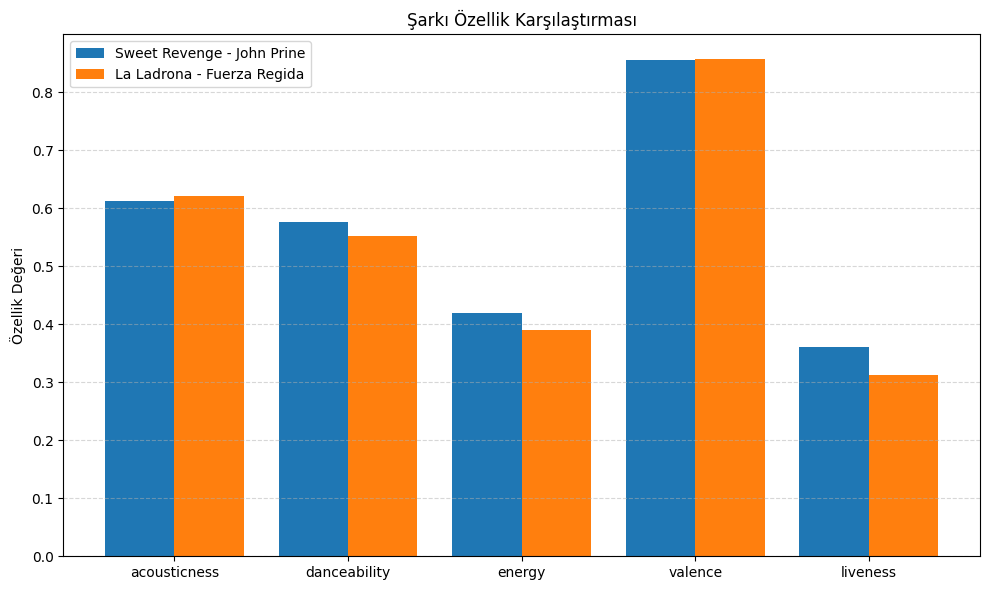

artist_name                     Fuerza Regida
track_id               35PsCVG6oj3RckIOxUvDde
track_name                         La Ladrona
acousticness                            0.621
danceability                            0.553
duration_ms                            197627
energy                                  0.391
instrumentalness                          0.0
key                                         0
liveness                                0.313
loudness                               -4.964
mode                                        1
speechiness                            0.0523
tempo                                 139.965
time_signature                              4
valence                                 0.857
popularity                                 55
cluster                                     1
acousticness_scaled                  0.805752
danceability_scaled                 -0.149773
energy_scaled                       -0.684551
valence_scaled                    

In [9]:
find_most_similar_song_by_name("Revenge", artist_name="XXXTENTACION", popularity_threshold=50)


C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


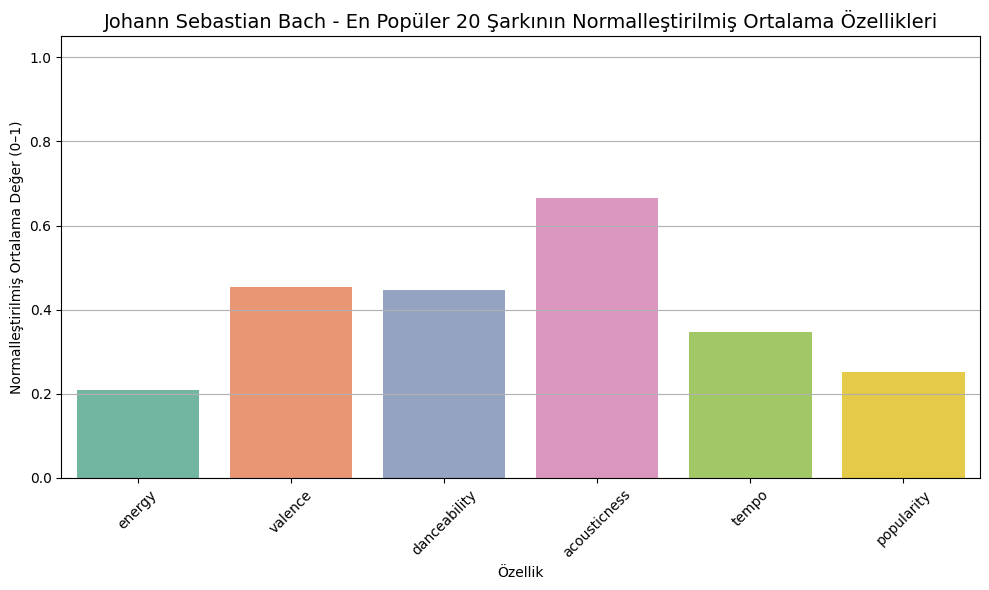

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


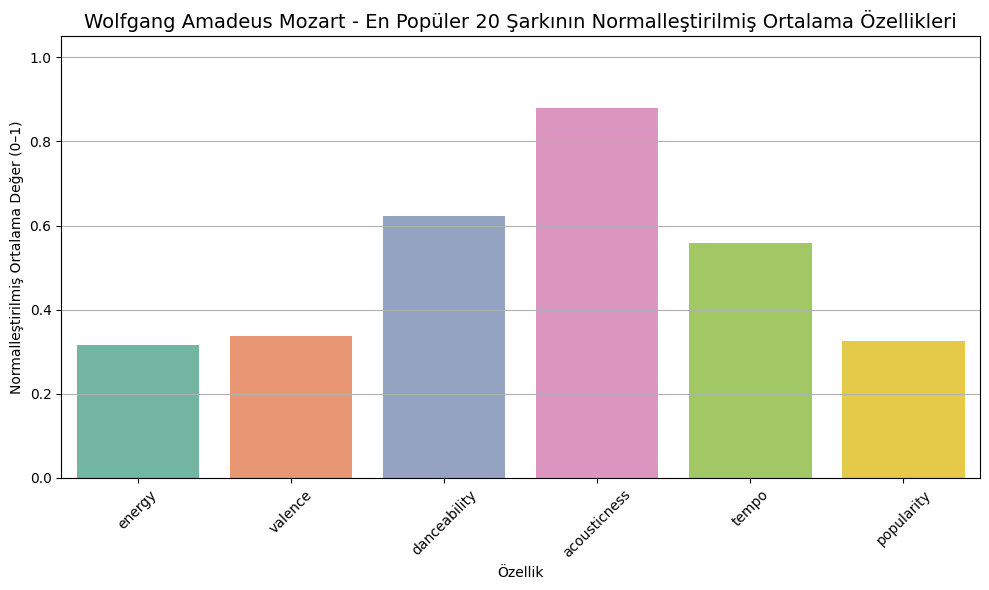

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


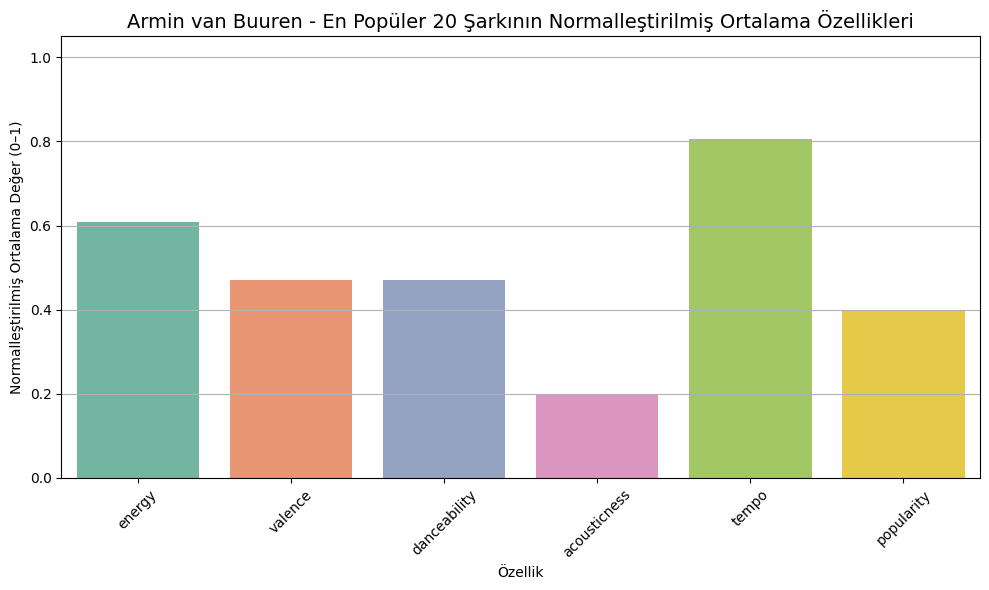

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


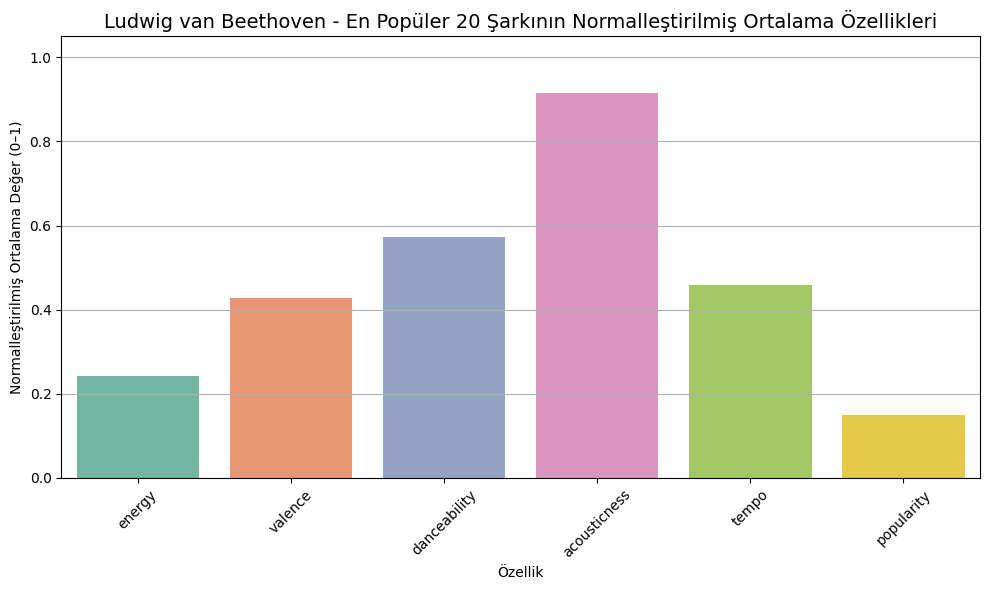

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


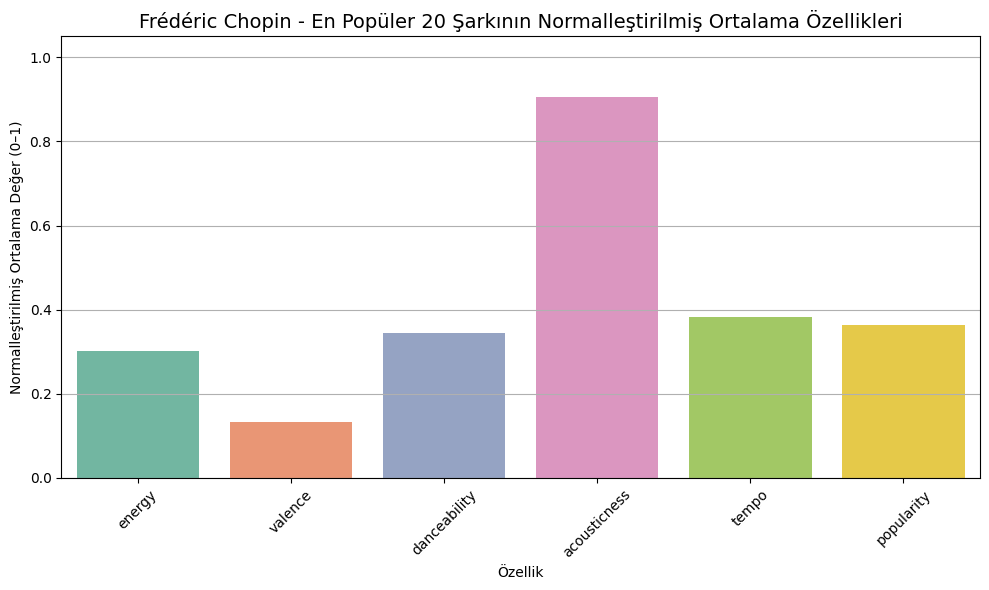

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


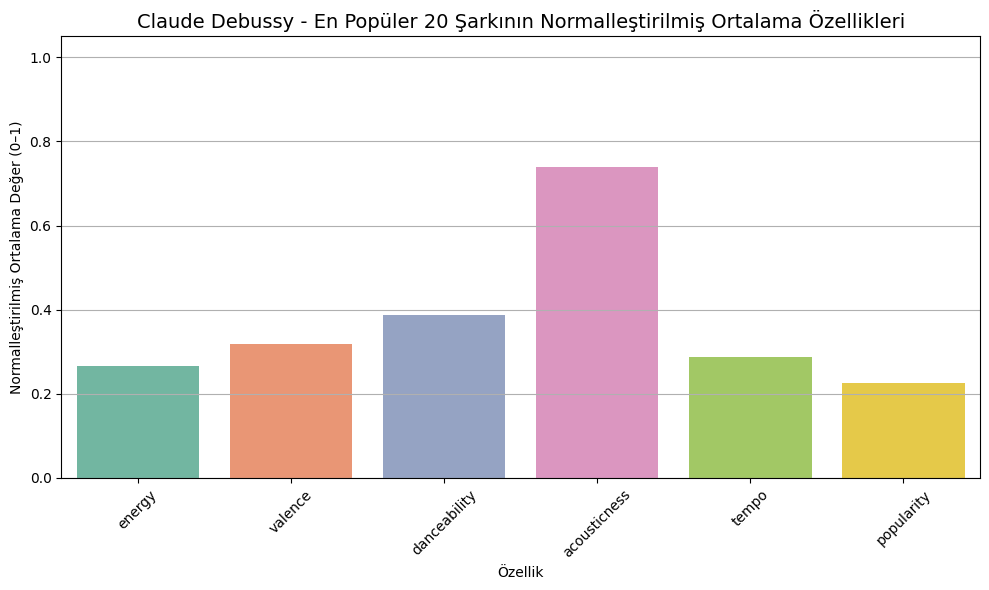

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


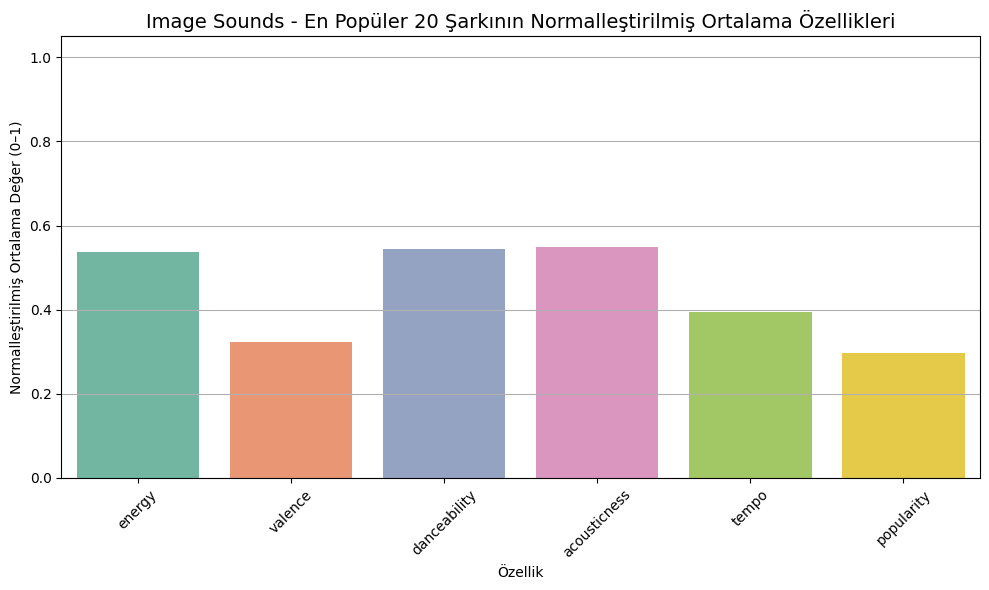

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


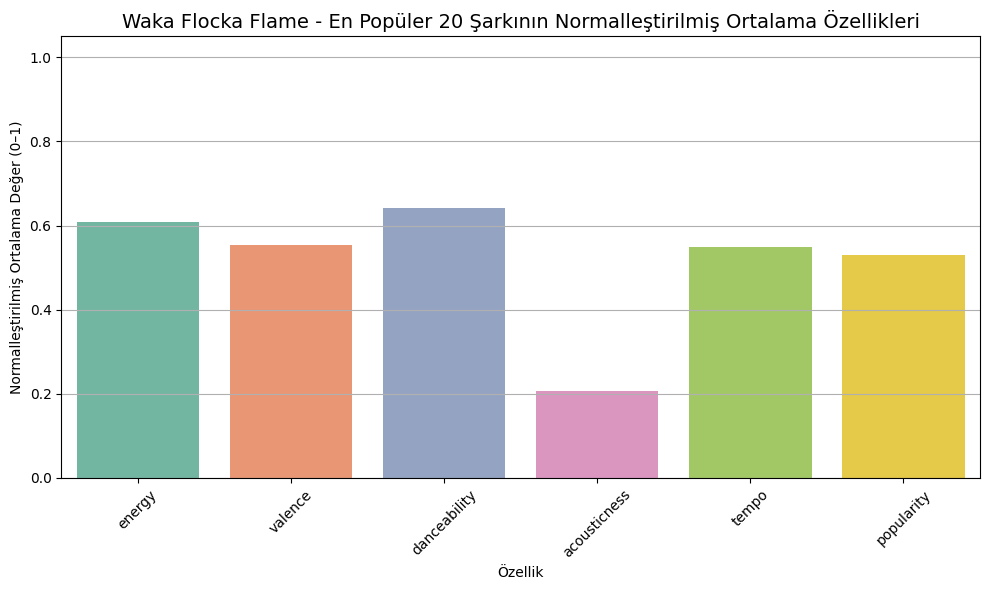

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


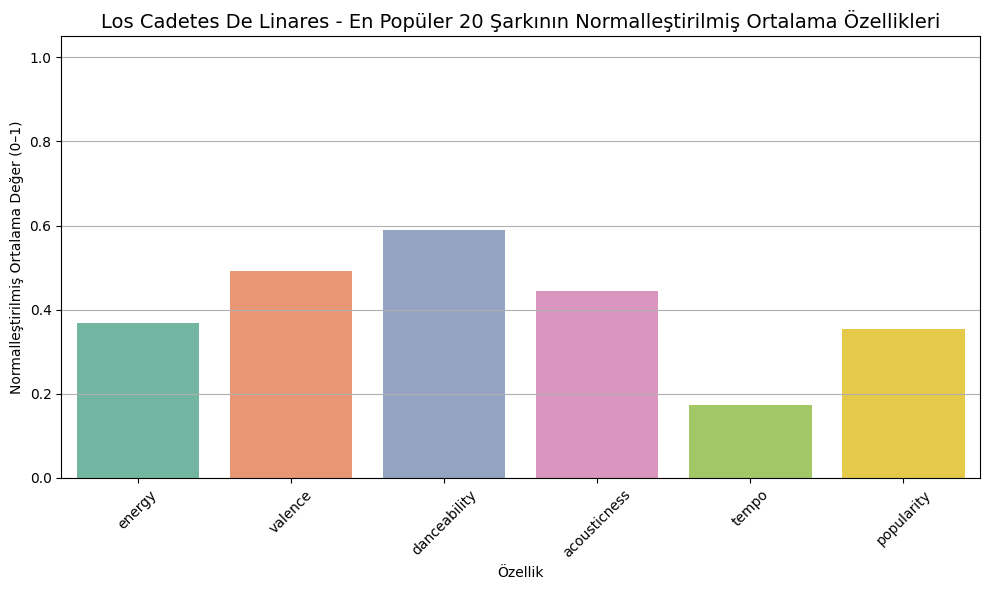

C:\Users\Tuna\AppData\Local\Temp\ipykernel_30108\1229352114.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")


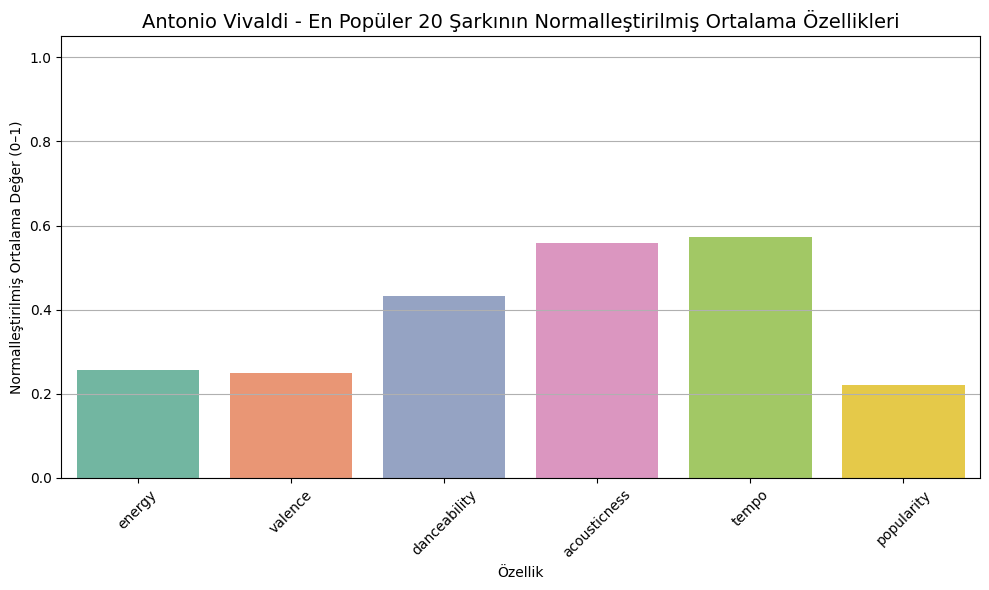

In [10]:
from sklearn.preprocessing import MinMaxScaler


# üìä En √ßok ≈üarkƒ±ya sahip 10 sanat√ßƒ±yƒ± se√ß (pop√ºlerlik deƒüil, ≈üarkƒ± sayƒ±sƒ± bazƒ±nda)
top_artists = df['artist_name'].value_counts().head(10).index

# üéØ Kullanƒ±lacak √∂zellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo', 'popularity']

# üîÅ Her sanat√ßƒ± i√ßin analiz yap
for artist in top_artists:
    # üéµ Sanat√ßƒ±nƒ±n verisini al
    artist_df = df[df['artist_name'] == artist]
    
    # üîù En pop√ºler 20 ≈üarkƒ±sƒ±nƒ± se√ß
    top_songs = artist_df.sort_values(by='popularity', ascending=False).head(20)

    # üéõ Normalizasyon
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(top_songs[features])
    normalized_df = pd.DataFrame(normalized, columns=features)

    # üìä Ortalama deƒüerleri al
    mean_values = normalized_df.mean()

    # üìà Grafik √ßiz
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_values.index, y=mean_values.values, palette="Set2")
    plt.title(f"{artist} - En Pop√ºler 20 ≈ûarkƒ±nƒ±n Normalle≈ütirilmi≈ü Ortalama √ñzellikleri", fontsize=14)
    plt.xlabel("√ñzellik")
    plt.ylabel("Normalle≈ütirilmi≈ü Ortalama Deƒüer (0‚Äì1)")
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [11]:
# Veriyi oku
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanƒ±lacak √∂zellikler
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'speechiness',
            'tempo', 'valence', 'popularity']

# En √ßok ≈üarkƒ±ya sahip 10 sanat√ßƒ±yƒ± se√ß
top_artists = df['artist_name'].value_counts().head(10).index

# Her sanat√ßƒ± i√ßin korelasyonlarƒ± tutacak s√∂zl√ºk
correlations = {}

for artist in top_artists:
    artist_df = df[df['artist_name'] == artist]
    top_songs = artist_df.sort_values(by='popularity', ascending=False).head(20)

    # Normalize et
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(top_songs[features])
    normalized_df = pd.DataFrame(normalized, columns=features)

    # Pop√ºlerlik ile diƒüer √∂zellikler arasƒ±ndaki korelasyon
    corr_series = normalized_df.corr()['popularity'].drop('popularity')
    correlations[artist] = corr_series

# DataFrame'e √ßevir
correlation_df = pd.DataFrame(correlations).T

# Sonu√ßlarƒ± yazdƒ±r
print("\nüéØ POP√úLERLƒ∞K ƒ∞LE √ñZELLƒ∞KLERƒ∞N KORELASYONLARI (10 SANAT√áI)\n")
print(correlation_df.round(3))

# Ortalama korelasyonu hesapla
mean_corr = correlation_df.mean().sort_values(ascending=False)
print("\nüìå Ortalama Korelasyonlar (Pop√ºlerliƒüi etkileyen √∂zellikler):\n")
print(mean_corr.round(3))



üéØ POP√úLERLƒ∞K ƒ∞LE √ñZELLƒ∞KLERƒ∞N KORELASYONLARI (10 SANAT√áI)

                         acousticness  danceability  duration_ms  energy  \
Johann Sebastian Bach           0.579         0.178        0.232   0.360   
Wolfgang Amadeus Mozart         0.170        -0.038        0.084   0.159   
Armin van Buuren               -0.252        -0.007        0.522   0.006   
Ludwig van Beethoven            0.058        -0.067       -0.295  -0.066   
Fr√©d√©ric Chopin                 0.149         0.015        0.393  -0.044   
Claude Debussy                  0.065        -0.231        0.149  -0.096   
Image Sounds                   -0.072        -0.321       -0.226  -0.096   
Waka Flocka Flame              -0.063         0.451       -0.296  -0.263   
Los Cadetes De Linares          0.023         0.093        0.240  -0.089   
Antonio Vivaldi                 0.375         0.505       -0.026   0.485   

                         instrumentalness  liveness  loudness  speechiness  \
Johann Sebast

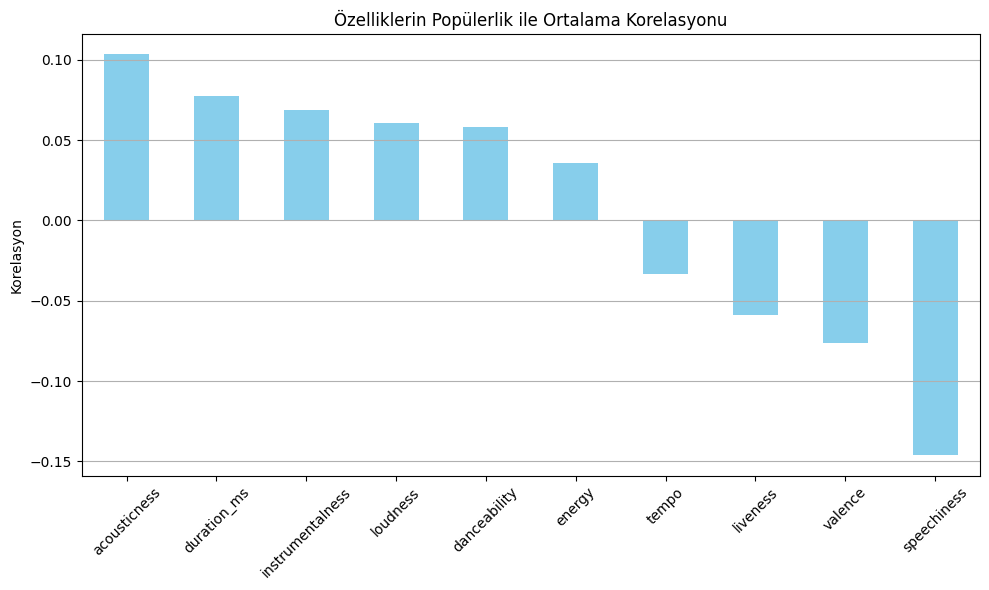

In [12]:
# Bar grafiƒüi ile genel korelasyonlarƒ± g√∂r
plt.figure(figsize=(10,6))
mean_corr.plot(kind='bar', color='skyblue')
plt.title("√ñzelliklerin Pop√ºlerlik ile Ortalama Korelasyonu")
plt.ylabel("Korelasyon")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


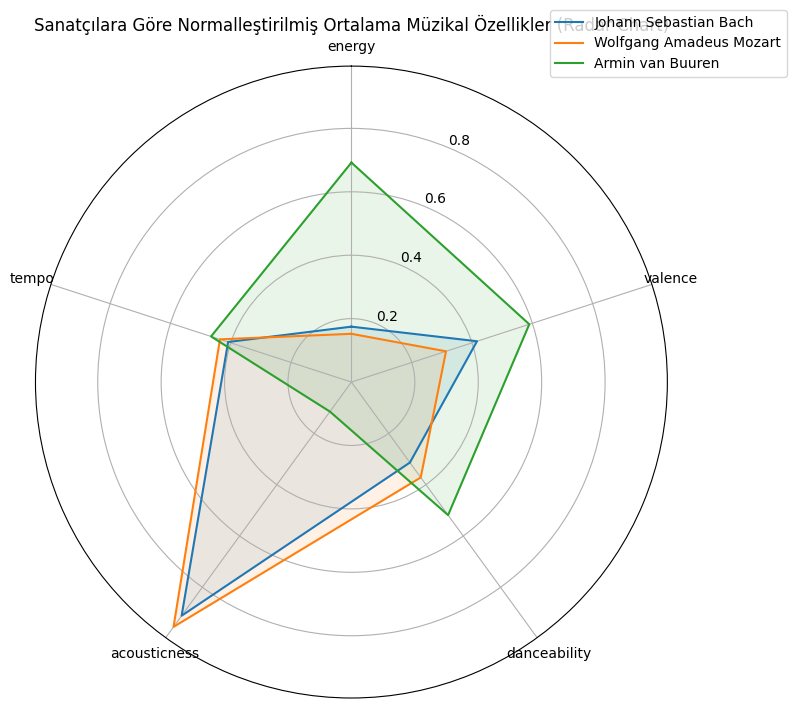

In [13]:
# Veriyi oku
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanƒ±lacak √∂zellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']

# T√ºm veriyi normalle≈ütir (0-1 arasƒ±)
df_norm = df.copy()
for feature in features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df_norm[feature] = (df[feature] - min_val) / (max_val - min_val)

# Sanat√ßƒ± bazƒ±nda ortalama al
artist_avg = df_norm.groupby('artist_name')[features].mean()

# En √ßok ≈üarkƒ±sƒ± olan 3 sanat√ßƒ±yƒ± al
top_artists = df['artist_name'].value_counts().head(3).index.tolist()

# Radar grafiƒüi i√ßin a√ßƒ±larƒ± olu≈ütur
labels = features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Ba≈ülangƒ±√ß noktasƒ±nƒ± kapatmak i√ßin ilk a√ßƒ±yƒ± tekrar ekle

# Grafik ayarlarƒ±
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her sanat√ßƒ± i√ßin √ßizim yap
for artist in top_artists:
    values = artist_avg.loc[artist].tolist()
    values += values[:1]  # Kapatmak i√ßin ilk deƒüeri sona ekle
    ax.plot(angles, values, label=artist)
    ax.fill(angles, values, alpha=0.1)

# G√∂rsel ayarlar
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Sanat√ßƒ±lara G√∂re Normalle≈ütirilmi≈ü Ortalama M√ºzikal √ñzellikler (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


In [14]:
# Belirli e≈üiklerle alƒ±≈üƒ±lmƒ±≈üƒ±n dƒ±≈üƒ±nda pop√ºler olanlarƒ± bul
unusual_hits = df[(df['energy'] < 0.4) & (df['popularity'] > 80)]
print(unusual_hits[['artist_name', 'track_name', 'energy', 'popularity']].sort_values(by='popularity', ascending=False))


            artist_name                                         track_name  \
124042        Lady Gaga                                            Shallow   
99372     Ariana Grande                                            7 rings   
99363           J. Cole                                       MIDDLE CHILD   
99379     Billie Eilish                                      bury a friend   
123895    Billie Eilish                               lovely (with Khalid)   
99374     Billie Eilish                                  wish you were gay   
101723  Sebastian Yatra                                             Un A√±o   
125381         Blueface                                           Thotiana   
99376     Billie Eilish                                              xanny   
99378     Billie Eilish                               my strange addiction   
99381     Billie Eilish                                         i love you   
99385     Billie Eilish                                 listen 

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# √ñzellikleri ve hedefi se√ß
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']
X = df[features].dropna()
y = df.loc[X.index, 'popularity']

# Veriyi √∂l√ßeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eƒüitim ve test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli eƒüit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti √ºzerinden tahmin ve skor
y_pred = model.predict(X_test)
print("R2 Skoru:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# √ñzellik √∂nem dereceleri
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\n√ñzellik √ñnem Dereceleri:\n", importances)


R2 Skoru: 0.06165221052625525
RMSE: 19.079260123447987


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



√ñzellik √ñnem Dereceleri:
 tempo           0.207729
acousticness    0.206299
energy          0.200825
valence         0.193690
danceability    0.191456
dtype: float64


In [16]:
# Veri setinden rastgele bir satƒ±r se√ß (pop√ºlerlik hari√ß)
random_index = np.random.choice(X.index)
sample_features = X.loc[random_index].values.reshape(1, -1)
true_popularity = y.loc[random_index]

# Se√ßilen √∂rneƒüi √∂l√ßeklendir
sample_scaled = scaler.transform(sample_features)

# Tahmin yap
predicted_popularity = model.predict(sample_scaled)[0]

# Sonu√ßlarƒ± yazdƒ±r
print(f"Rastgele se√ßilen ≈üarkƒ± √∂zellikleri: {X.loc[random_index].to_dict()}")
print(f"Ger√ßek pop√ºlerlik deƒüeri: {true_popularity}")
print(f"Tahmin edilen pop√ºlerlik deƒüeri: {predicted_popularity:.2f}")


Rastgele se√ßilen ≈üarkƒ± √∂zellikleri: {'energy': 0.82, 'valence': 0.0623, 'danceability': 0.4529999999999999, 'acousticness': 4.85e-05, 'tempo': 136.985}
Ger√ßek pop√ºlerlik deƒüeri: 15
Tahmin edilen pop√ºlerlik deƒüeri: 15.68


C:\Users\Tuna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              artist_name                  track_name  anomaly_score  \
125400        Max Richter   A Catalogue Of Afternoons      10.173859   
120590    Steven Goldmund            Enter the Unseen       9.385456   
125024         Primer Dia            Floating, Always       9.373966   
126349         Masala Roo          Pads of Redemption       9.241666   
99392       Billie Eilish                     goodbye       8.990831   
121906    Elise Magnefold                    Heavenly       8.775545   
101891         Primer Dia                    Daenerys       8.764204   
124966         Primer Dia              Astral Therapy       8.759958   
121016       Dream Runner                      Magica       8.752499   
120958            Tedosio             The Book of Jen       8.643076   
101878         Deep Watch           Reasons For Being       8.536609   
115452    Steven Goldmund                  Mind-Drift       8.518200   
102063       Kina Grannis  Can't Help Falling In Love       8.45

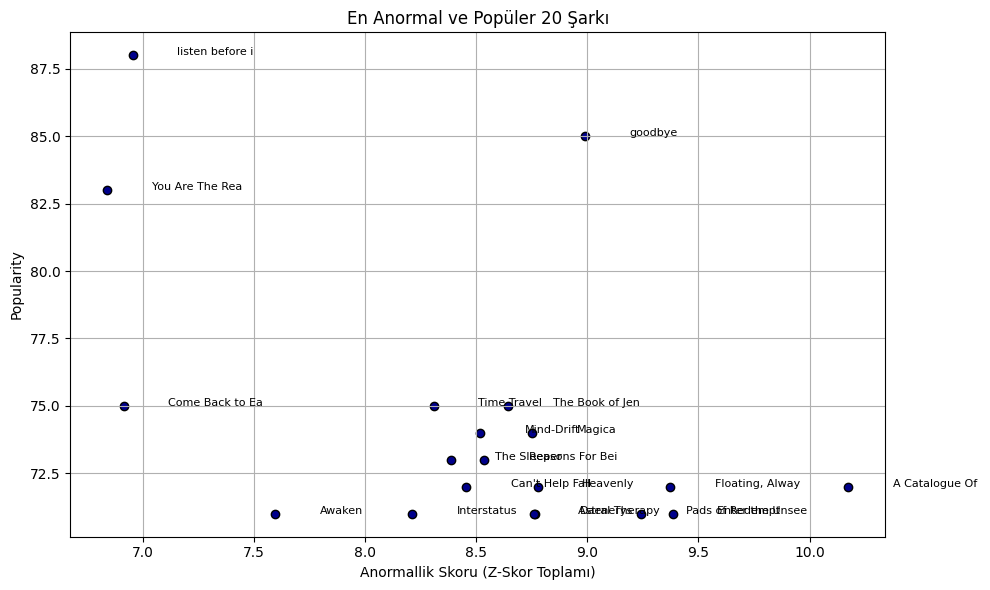

In [17]:
# Veriyi y√ºkle
df = pd.read_csv("C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv")

# Kullanƒ±lacak m√ºziksel √∂zellikler
features = ['energy', 'valence', 'danceability', 'acousticness', 'tempo']

# Z-score hesaplama
df_z = df[features].apply(zscore)

# Toplam anormallik skorunu hesapla
df['anomaly_score'] = df_z.abs().sum(axis=1)

# Ko≈üul: daha esnek bir e≈üik + pop√ºlerlik
anomaly_threshold = 6
popularity_threshold = 70
unusual_hits = df[(df['anomaly_score'] > anomaly_threshold) & (df['popularity'] > popularity_threshold)]

# En y√ºksek anormallik skoruna sahip 20 ≈üarkƒ±yƒ± al
top_unusual_hits = unusual_hits.sort_values(by='anomaly_score', ascending=False).head(20)

# Terminal √ßƒ±ktƒ±sƒ±
print(top_unusual_hits[['artist_name', 'track_name', 'anomaly_score', 'popularity']])

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
plt.scatter(top_unusual_hits['anomaly_score'], top_unusual_hits['popularity'], c='darkblue', edgecolor='black')
plt.title("En Anormal ve Pop√ºler 20 ≈ûarkƒ±")
plt.xlabel("Anormallik Skoru (Z-Skor Toplamƒ±)")
plt.ylabel("Popularity")
plt.grid(True)

# Etiket (≈üarkƒ± adlarƒ±) ekle
for i, row in top_unusual_hits.iterrows():
    plt.text(row['anomaly_score'] + 0.2, row['popularity'], row['track_name'][:15], fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# Gerekli k√ºt√ºphaneleri i√ße aktar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules

# CSV dosyasƒ±nƒ± oku (veri yolunu kendi bilgisayarƒ±ndakiyle deƒüi≈ütir)
file_path = "C:/Users/Tuna/Downloads/SpotifyAudioFeaturesApril2019.csv"
df = pd.read_csv(file_path)

# ƒ∞steƒüe baƒülƒ±: ilk birka√ß satƒ±ra bak
print(df.head())

# -----------------------------------------
# ADIM 1: ≈ûarkƒ± √ñzelliklerinden Etiketler √úret
# -----------------------------------------

def create_music_labels(row):
    labels = []
    if row['energy'] > 0.7:
        labels.append('high_energy')
    if row['acousticness'] > 0.8:
        labels.append('acoustic')
    if row['danceability'] > 0.7:
        labels.append('dance_hit')
    if row['valence'] > 0.6:
        labels.append('happy')
    if row['valence'] < 0.3:
        labels.append('sad')
    if row['instrumentalness'] > 0.9:
        labels.append('instrumental')
    if row['speechiness'] > 0.66:
        labels.append('speech')
    return labels

df['labels'] = df.apply(create_music_labels, axis=1)

# -----------------------------------------
# ADIM 2: Etiketleri One-Hot Encoding'e √áevir
# -----------------------------------------

mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(df['labels'])
df_encoded = pd.DataFrame(label_matrix, columns=mlb.classes_)

# -----------------------------------------
# ADIM 3: Apriori ile Sƒ±k √ñƒüe K√ºmelerini Bul
# -----------------------------------------

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)

print("\nSƒ±k ge√ßen √∂ƒüe k√ºmeleri:\n")
print(frequent_itemsets.head())

# -----------------------------------------
# ADIM 4: Birliktelik Kurallarƒ±nƒ± √úret
# -----------------------------------------

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='confidence', ascending=False)

print("\nBirliktelik Kurallarƒ±:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Etiketleri olu≈üturduktan sonra...
mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(df['labels'])
df_encoded = pd.DataFrame(label_matrix, columns=mlb.classes_)

# üîÑ 3 ve 4 √∂ƒüeli kombinasyonlarƒ± da alacak ≈üekilde apriori √ßalƒ±≈ütƒ±r
frequent_itemsets = apriori(df_encoded,
                            min_support=0.01,
                            use_colnames=True,
                            max_len=4)  # ‚Üê burada 4'e kadar kombinasyon √ºretilecek

# Her kombinasyonun ka√ßlƒ± olduƒüunu ekleyelim
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# üß™ 3'l√º kombinasyonlarƒ± g√∂r
print("\n3 √∂ƒüeden olu≈üan sƒ±k itemset'ler:\n")
print(frequent_itemsets[frequent_itemsets['itemset_len'] == 3].sort_values(by='support', ascending=False).head())

# üß™ 4'l√º kombinasyonlarƒ± g√∂r
print("\n4 √∂ƒüeden olu≈üan sƒ±k itemset'ler:\n")
print(frequent_itemsets[frequent_itemsets['itemset_len'] == 4].sort_values(by='support', ascending=False).head())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sayƒ±sal s√ºtunlarƒ± ayƒ±r (√∂rneƒüin: artist_name, track_id, track_name gibi metin s√ºtunlarƒ±nƒ± √ßƒ±kar)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Sayƒ±sal veriyi √∂l√ßekle (√∂l√ß√º birimlerini e≈üitlemek i√ßin)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# KMeans k√ºmeleme (4 k√ºme √∂rnek olarak)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Sadece sayƒ±sal s√ºtunlarƒ± se√ß
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# K√ºme bazƒ±nda ortalama deƒüerleri al
cluster_means = df.groupby("Cluster")[numeric_cols].mean()

# Sonu√ßlarƒ± yazdƒ±r
print(cluster_means)
